In [1]:
# importing the data
import pandas as pd
df=pd.read_excel('glass.xlsx',sheet_name=1)
df2=pd.read_excel('glass.xlsx',sheet_name=0)
print(df)
df2


          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [36]:
## checking any duplicate rows are present
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [2]:
# droping that row
df.drop(df.index[39],inplace=True)
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [7]:
df.shape

(214, 10)

## Exploratory Data Analysis (EDA):

In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [38]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


## Data Visualization:

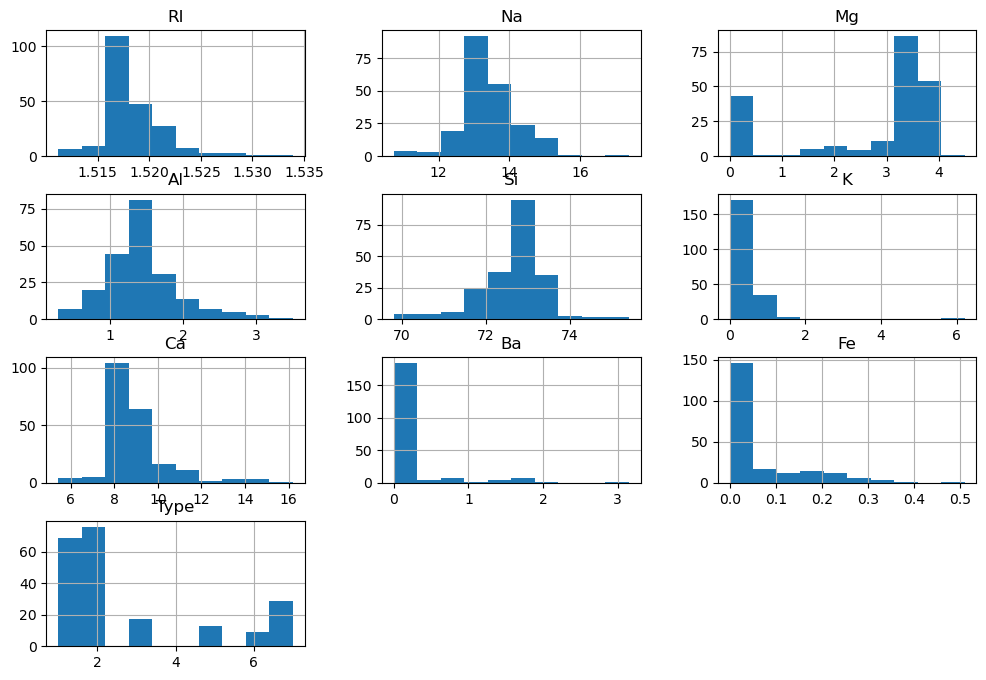

<Axes: >

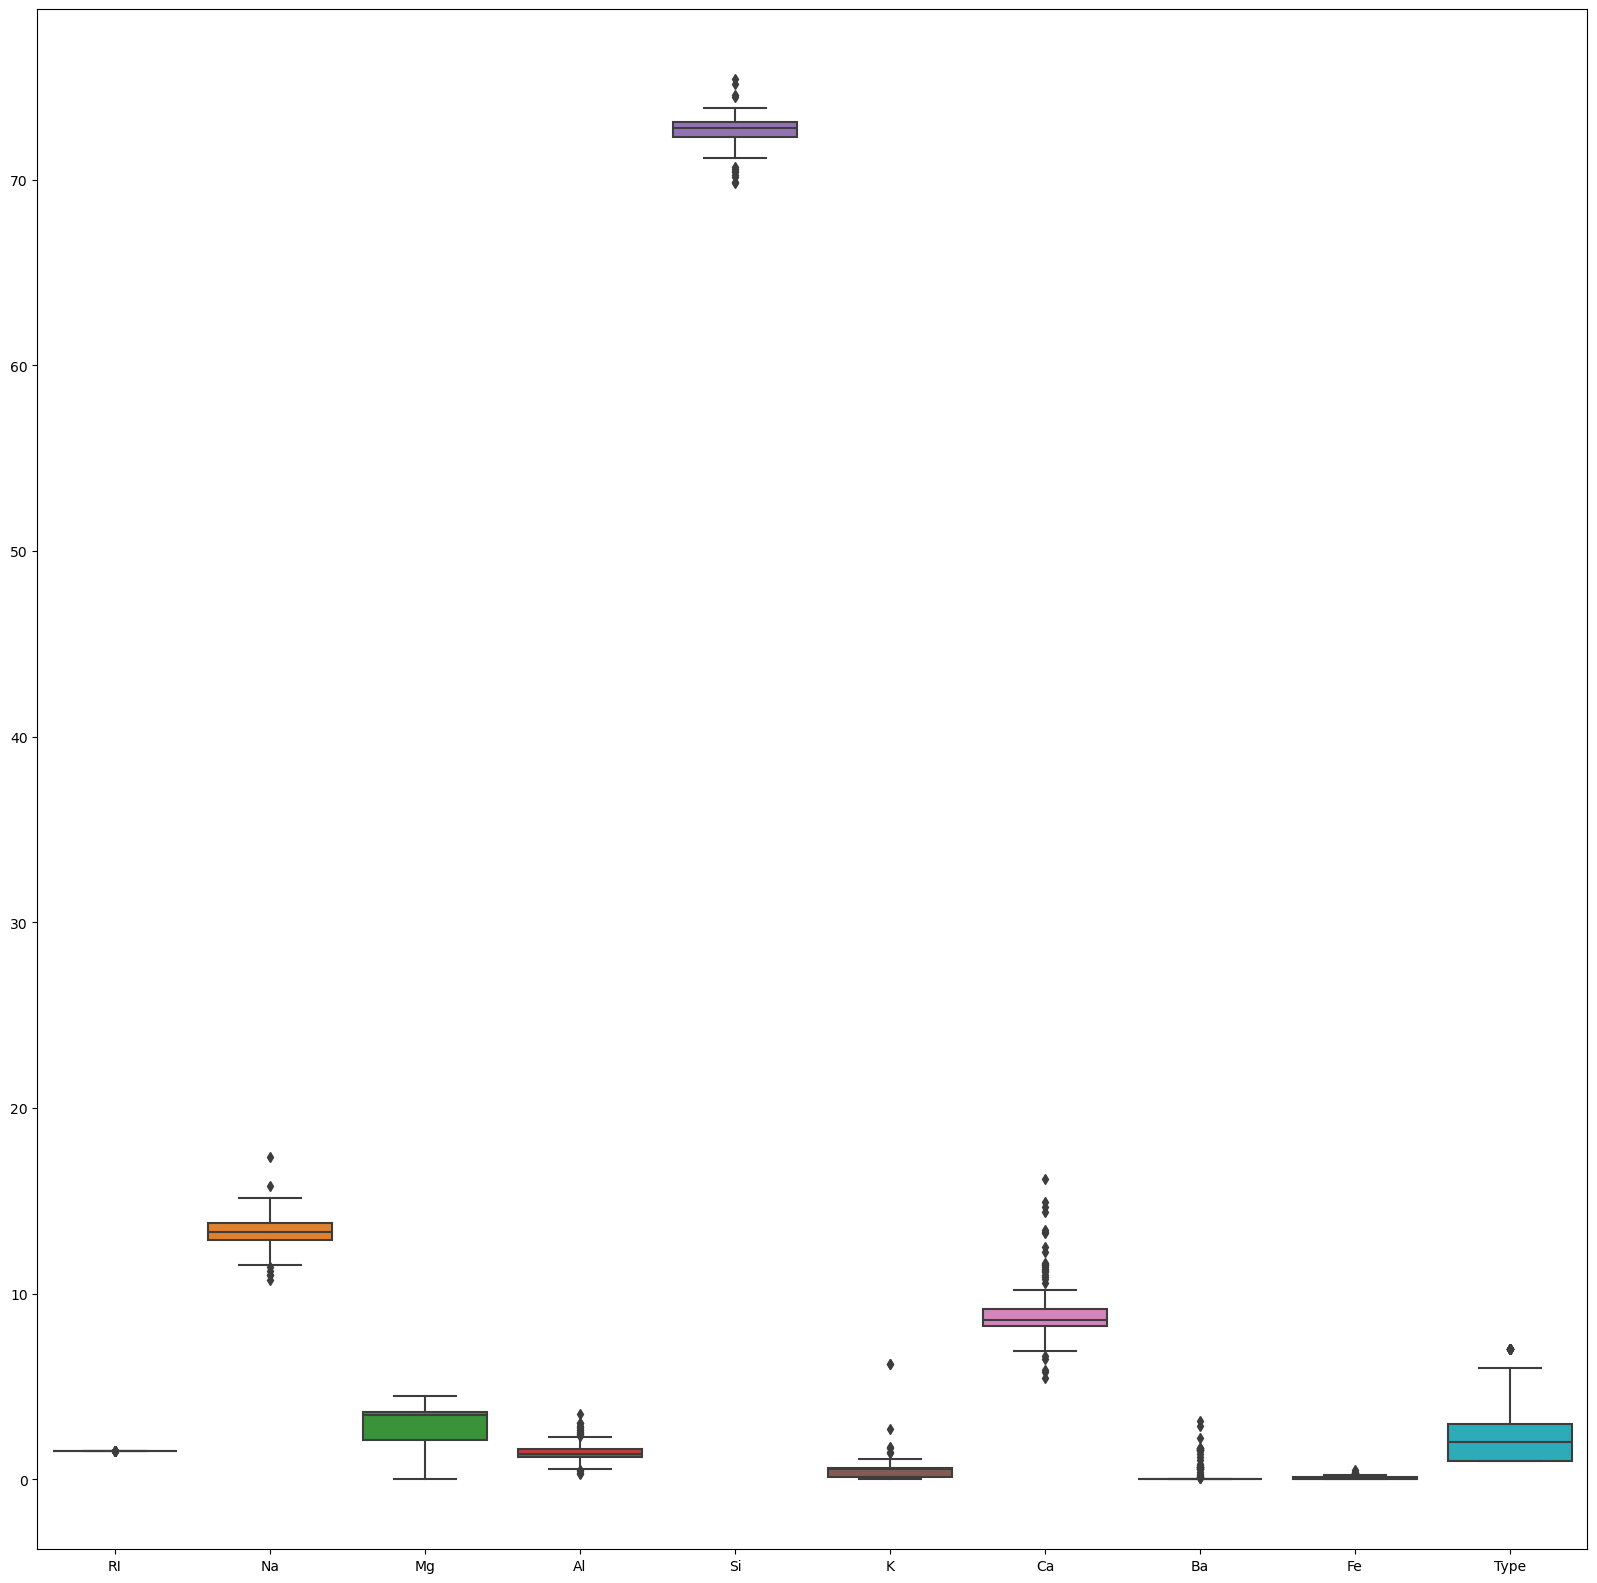

In [39]:

# Histogrtam
df.hist(figsize=(12,8))
plt.show()


# box-plot

import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=df,ax=ax)


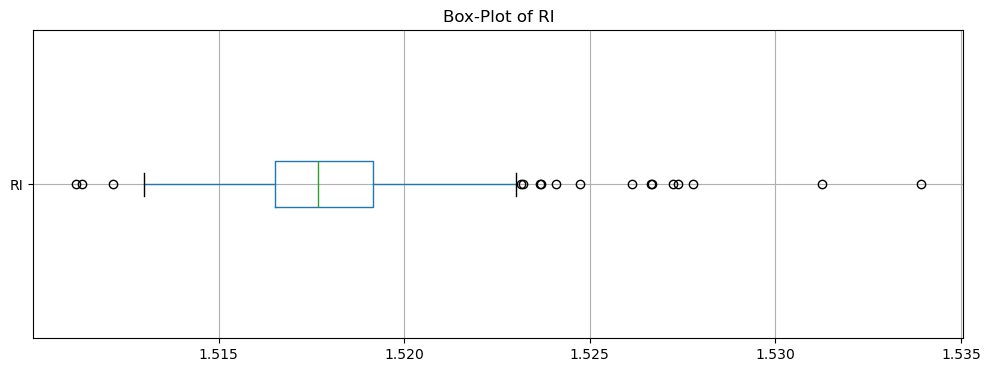

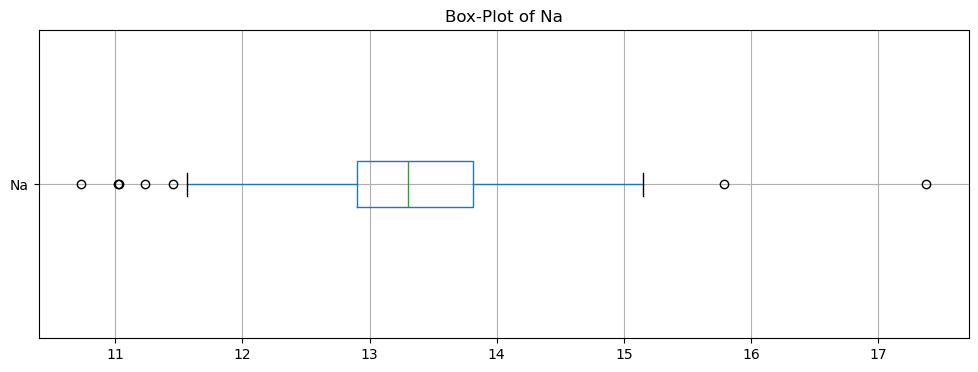

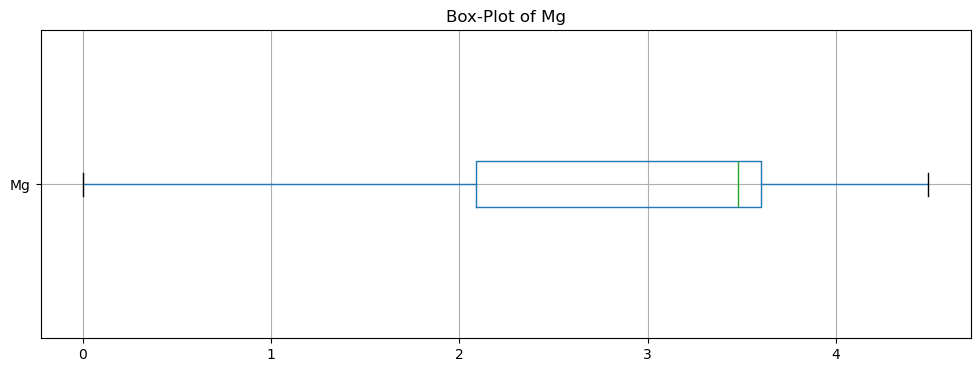

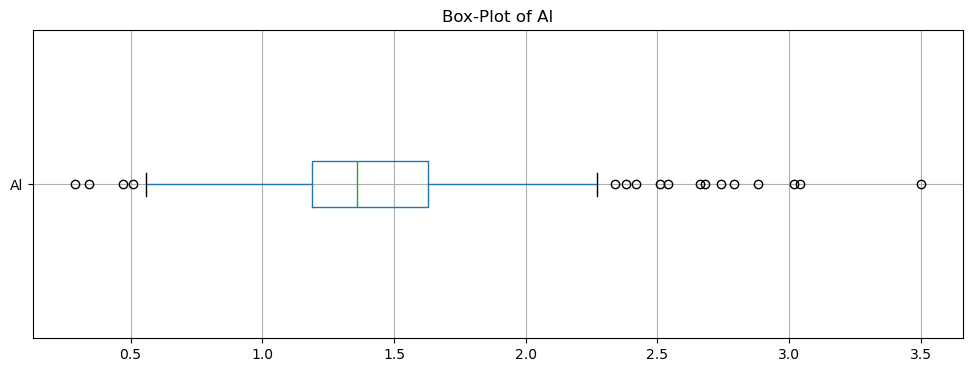

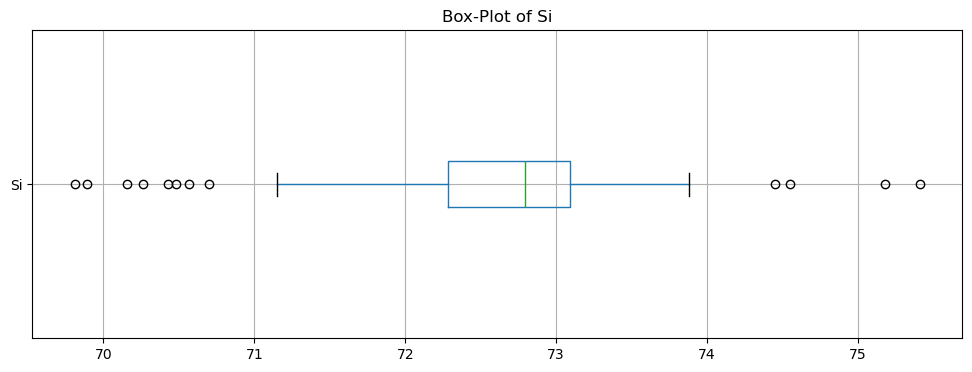

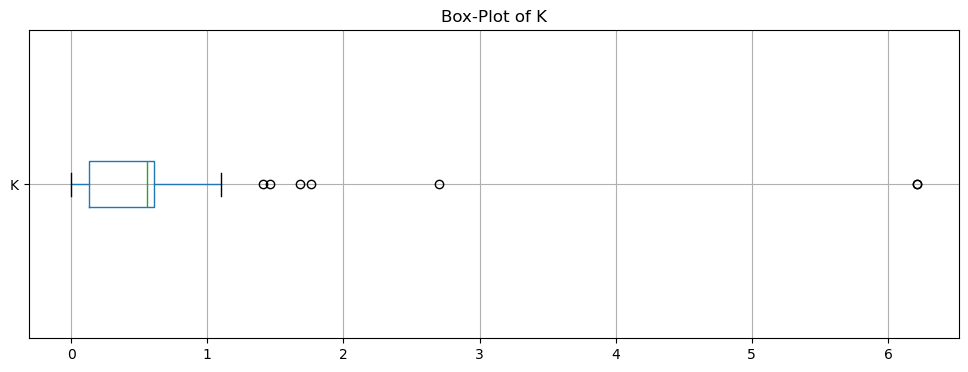

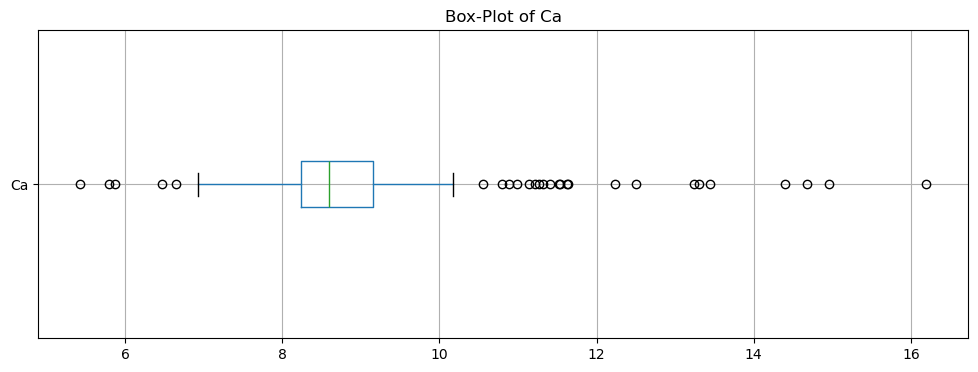

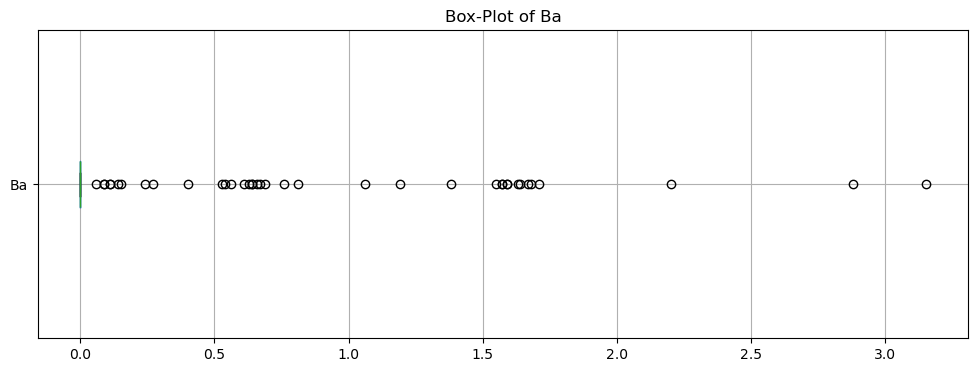

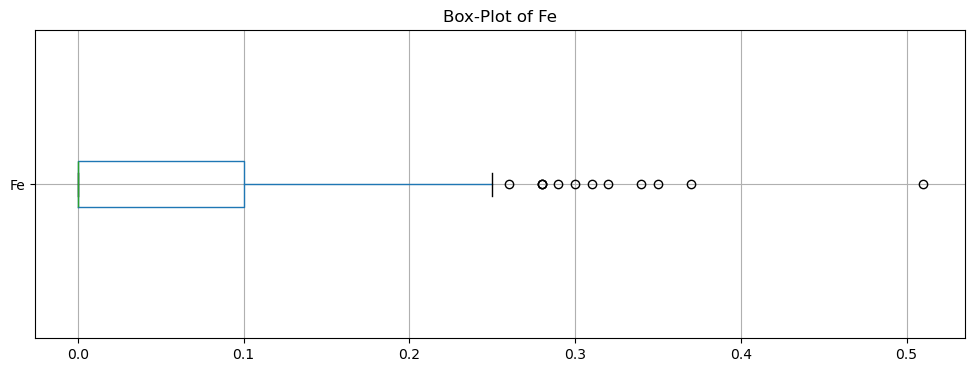

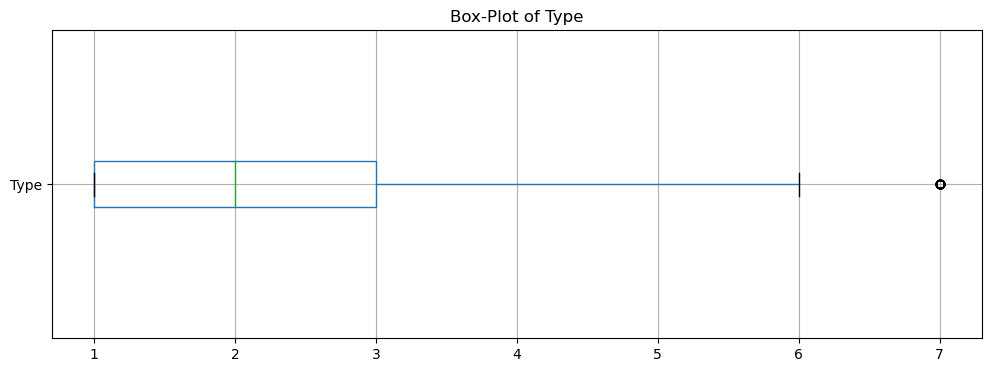

In [40]:
for i in df:
    # taking ploting dimension as 12x4
    plt.figure(figsize=(12,4))
    # visualizating box-plot taking vert as False mean's printing in horizantial direction
    df.boxplot(column=i,vert=False)
    plt.title(f'Box-Plot of {i}')
    plt.show()

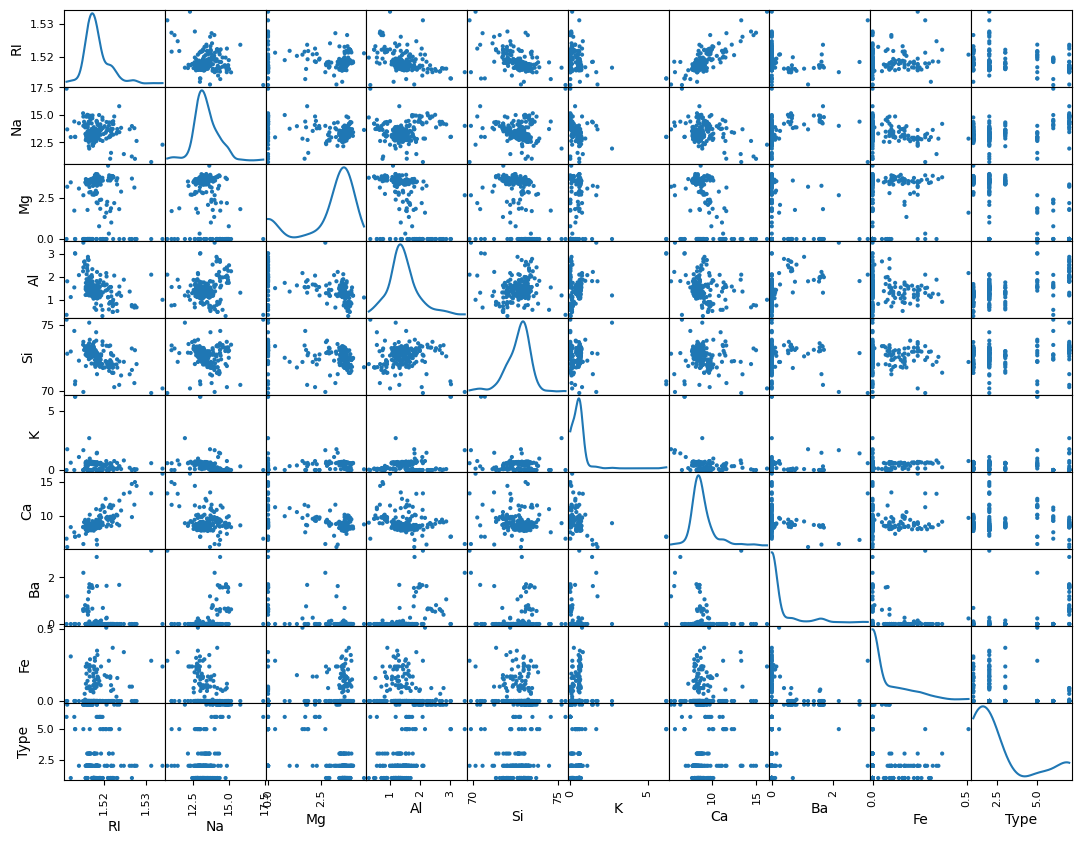

In [17]:
#pair -vise visualization

import seaborn as sns
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df, alpha=1, figsize=(13, 10), diagonal='kde')
plt.show()


## Data Preprocessing

In [3]:

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(df.iloc[:,:9])
df


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Random Forest Model Implementation

In [5]:
# Data Partation

X=df.iloc[:,:9]
Y=df['Type']

# RandomForest Regressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score, precision_score,recall_score
from sklearn.metrics import f1_score,accuracy_score


import numpy as np
training_error = []
test_error = []
test_accuracy_score = []
test_precision_score = []
test_f1_score = []
test_recall_score = []


for i in range(1,101,1):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    clf = RandomForestClassifier(n_estimators=200,max_features =0.6,max_samples=0.7)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(y_pred_train, y_train)))
    test_error.append(np.sqrt(mean_squared_error(y_pred_test, y_test)))
    
    test_precision_score.append(precision_score(y_pred_test,y_test,average='weighted',labels=np.unique(y_pred_test)))
    
    test_recall_score.append(recall_score(y_test,y_pred_test,average='weighted',labels=np.unique(y_pred_test)))
    
    test_f1_score.append(f1_score(y_test, y_pred_test, average='weighted'))

    test_accuracy_score.append(accuracy_score(y_test, y_pred_test))

# Print the results
print("CrossValidation-DecisionTreeRegressor-Training Error:", np.mean(training_error))
print("CrossValidation-DecisionTreeRegressor-Testing Error:", np.mean(test_error))
print("Variance:", np.mean(test_error) - np.mean(training_error))

print("CV- Test prescision score: ",np.mean(test_precision_score).round(2))

print("CV- Test recall score: ",np.mean(test_recall_score).round(2))

print("CV- Test f1 score: ",np.mean(test_f1_score).round(2))

print("CV- Test accuray score: ",np.mean(test_accuracy_score).round(2))

C:\Users\jalli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jalli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jalli\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jalli\anaconda3\Lib\site-packages\sklea

CrossValidation-DecisionTreeRegressor-Training Error: 0.04692317869949397
CrossValidation-DecisionTreeRegressor-Testing Error: 1.1023241717315373
Variance: 1.0554009930320434
CV- Test prescision score:  0.82
CV- Test recall score:  0.78
CV- Test f1 score:  0.77
CV- Test accuray score:  0.78


## Bagging and Boosting Methods

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Define the decision tree model
model = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", accuracy)


Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Test accuracy: 0.6744186046511628


In [10]:
# Bagging Regressor
from sklearn.ensemble import BaggingClassifier

training_error = []
test_error = []

for i in range(1,101,1):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
  model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini', max_depth=5),n_estimators=200,max_features =0.6,max_samples=0.7)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  training_error.append(np.sqrt(mean_squared_error(y_pred_train, y_train)))
  test_error.append(np.sqrt(mean_squared_error(y_pred_test, y_test)))

# Print the results
print("CV-Bag-Training Error:", np.mean(training_error))
print("CV-Bag-Testing Error:", np.mean(test_error))
print("Variance:", np.mean(test_error) - np.mean(training_error))

CV-Bag-Training Error: 0.6060418399178966
CV-Bag-Testing Error: 1.2095553937712697
Variance: 0.6035135538533731


In [60]:
# Gradient Boosting 
from sklearn.ensemble import  GradientBoostingRegressor

training_error = []
test_error = []

for i in range(1,101,1):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
  model =  GradientBoostingRegressor(n_estimators=300,learning_rate=0.01)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  training_error.append(np.sqrt(mean_squared_error(y_pred_train, y_train)))
  test_error.append(np.sqrt(mean_squared_error(y_pred_test, y_test)))

# Print the results
print("CV-GB-Training Error:", np.mean(training_error))
print("CV-GB-Testing Error:", np.mean(test_error))
print("Variance:", np.mean(test_error) - np.mean(training_error))

CV-GB-Training Error: 0.4952064419784277
CV-GB-Testing Error: 1.0595414713717186
Variance: 0.5643350293932909
